# Comparing Jesse's previous output to new program output

In [1]:
import random as rand
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
def plot_spec(SPECTRA, COLOR):
    plt.vlines(SPECTRA.columns, np.repeat(0, len(SPECTRA.columns)), SPECTRA, colors=COLOR)

In [3]:
def plot_line(v, m):
    plt.hlines(y=0.7,xmin=0,xmax=m,colors='red')

In [4]:
jesse_df = pd.read_csv('Data/MSPLIToutput.txt', sep='\t')
caleb_df = pd.read_csv('Data/fullOutput.csv')

jesse_df['ID'] = list(zip(jesse_df['Scan#'].tolist(),jesse_df['Peptide'].tolist()))
jesse_df = jesse_df.loc[:, jesse_df.columns.intersection(['ID','cosine'])]
jesse_dict = jesse_df.set_index('ID')['cosine'].to_dict()

caleb_df['ID'] = list(zip(caleb_df['scan#'].tolist(),caleb_df['peptide'].tolist()))
caleb_df = caleb_df.loc[:, caleb_df.columns.intersection(['ID','cosine'])]
caleb_df_high = caleb_df.drop(caleb_df[caleb_df['cosine'] < 0.7].index) 
caleb_df_low = caleb_df.drop(caleb_df[caleb_df['cosine'] >= 0.7].index) 

caleb_dict_high = caleb_df_high.set_index('ID')['cosine'].to_dict()
caleb_dict_low = caleb_df_low.set_index('ID')['cosine'].to_dict()

In [5]:
len(jesse_dict.keys())

7077

In [6]:
len(caleb_dict_high.keys())

30356

In [7]:
len(caleb_dict_low.keys())

39553

## Intersect between Jesse's data and Caleb's data (0.7 and higher)

In [8]:
intersection = sorted(list(set(jesse_dict.keys()) & set(caleb_dict_high.keys())))
len(intersection)

4713

In [9]:
jesse_intersect = pd.DataFrame([[jesse_dict[k] for k in intersection]])
caleb_intersect = pd.DataFrame([[caleb_dict_high[k] for k in intersection]])
diff_intersect = pd.DataFrame([[abs(caleb_dict_high[k]-jesse_dict[k]) for k in intersection]])
compare = pd.DataFrame([[caleb_dict_high[k] for k in intersection],[jesse_dict[k] for k in intersection],intersection])
compare

0                   1                  2  \
0            0.951677            0.964447           0.975993   
1            0.813959            0.883383           0.898262   
2  (159, GSGTAEVELKK)  (160, GSGTAEVELKK)  (165, SIGVSNFNHR)   

                   3                  4                  5                  6  \
0           0.977169           0.983398           0.929657           0.952497   
1           0.901283           0.868973           0.820805           0.878095   
2  (166, SIGVSNFNHR)  (168, LLLQVQHASK)  (169, DPQALSEHLK)  (169, LLLQVQHASK)   

                    7                   8                   9  \
0             0.98091            0.979463            0.966251   
1            0.771313            0.797554            0.772866   
2  (176, FGLSVGHHLGK)  (205, VLQSFTVDSSK)  (206, VLQSFTVDSSK)   

                   10                   11                   12  \
0             0.99436             0.986542             0.973311   
1            0.878957             0.831153             0.912068   
2  (242, AFVDFLSDEIK)  (242, VTVLFAGQHIAK)  (250, VTVLFAGQHISK)   

                      13                   14                   15  \
0               0.980744             0.966665              0.96557   
1               0.897018               0.8598             0.907448   
2  (258, VLQATVVAVGSGSK)  (260, SLDMDSIIAEVK)  (261, SLDMDSIIAEVK)   

                      16                   17                   18  \
0               0.980395              0.97631             0.967263   
1               0.873789             0.912727             0.909876   
2  (270, GAVDGGLSIPHSTK)  (277, DSYVGDEAQSKR)  (278, DSYVGDEAQSKR)   

                     19                   20                     21  \
0              0.981576              0.95124                0.97283   
1              0.778276             0.793627               0.749697   
2  (281, VGGTSDVEVNEKK)  (285, LLEMILNKPGLK)  (286, ATIAGGGVIPHIHK)   

                    22                  23                    24  \
0             0.955486            0.989329              0.955638   
1             0.826618            0.910292              0.890428   
2  (288, VTLTSEEEARLK)  (291, TLEEDEEELFK)  (293, DLDVAILVGSMPR)   

                     25                     26                    27  \
0              0.974406               0.942714              0.947785   
1              0.875795                0.75402              0.752518   
2  (294, GVDEATIIDILTK)  (305, ILPTLEAVAALGNK)  (314, GTIEILSDVQLIK)   

                      28                    29                     30  \
0               0.977446              0.955756               0.988085   
1               0.866553               0.79136               0.840172   
2  (314, GVMLAVDAVIAELK)  (315, GTIEILSDVQLIK)  (315, GVMLAVDAVIAELK)   

                     31                    32                    33  \
0              0.979926              0.926674              0.971563   
1              0.877809              0.880798              0.790731   
2  (317, ANLPQSFQVDTSK)  (318, ANLPQSFQVDTSK)  (323, EGIPALDNFLDKL)   

                    34                    35                    36  \
0             0.940068              0.966645              0.962736   
1             0.805014               0.89304               0.90713   
2  (329, TPELNLDQFHDK)  (329, TVLIMELINNVAK)  (330, ILTFDQLALDSPK)   

                     37                    38                    39  \
0              0.949197              0.966134              0.919581   
1              0.867417              0.925257              0.911614   
2  (331, GVAINMVTEEDKR)  (331, ILTFDQLALDSPK)  (331, IYVDDGLISLQVK)   

                     40                    41                     42  \
0              0.971822              0.993829               0.978079   
1              0.926171              0.808427               0.884635   
2  (332, IYVDDGLISLQVK)  (334, GTQGVVTNFEIFR)  (340, VDEAVAVLQAHQAK)   

                     43                    44                    4

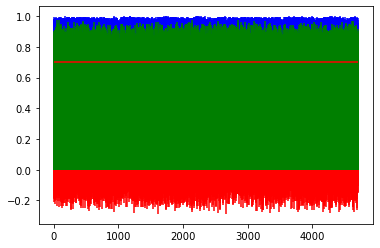

In [10]:
plot_spec(caleb_intersect, 'blue')
plot_spec(jesse_intersect, 'green')
plot_spec(-diff_intersect, 'red')
plot_line(0.7,len(intersection))

### first 150 (to improve visuals)

In [11]:
jesse_intersect = jesse_intersect.iloc[:,:150]
caleb_intersect = caleb_intersect.iloc[:,:150]
diff_intersect = diff_intersect.iloc[:,:150]

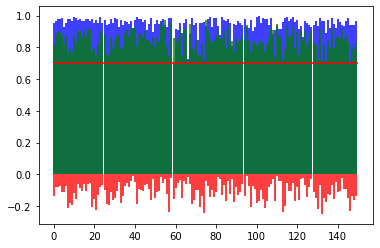

In [12]:
plot_spec(caleb_intersect, 'blue')
plot_spec(jesse_intersect, 'green')
plot_spec(-diff_intersect, 'red')
plot_line(0.7,150)

## Intersect between Jesse's data and Caleb's data (less than 0.7)

In [13]:
intersection = sorted(list(set(jesse_dict.keys()) & set(caleb_dict_low.keys())))
len(intersection)

145

In [14]:
jesse_intersect = pd.DataFrame([[jesse_dict[k] for k in intersection]])
caleb_intersect = pd.DataFrame([[caleb_dict_low[k] for k in intersection]])
diff_intersect = pd.DataFrame([[abs(caleb_dict_low[k]-jesse_dict[k]) for k in intersection]])
compare = pd.DataFrame([[caleb_dict_low[k] for k in intersection],[jesse_dict[k] for k in intersection],intersection])
compare

0                    1                2                  3  \
0        0.630252             0.630334         0.684131           0.593427   
1        0.736163             0.733019         0.746227           0.830695   
2  (603, VHAIPLR)  (609, NNTVTPGGKPNK)  (648, EAILAIHK)  (705, VGPGPALMLR)   

                   4                  5                  6  \
0           0.545783           0.544748           0.418279   
1           0.758422           0.721725           0.710111   
2  (708, SAVTTVVNPK)  (736, LVALAVIDEK)  (737, ATVNLLGEEK)   

                         7                        8                  9  \
0                 0.686067                 0.622625           0.542777   
1                 0.769417                 0.723526           0.711555   
2  (751, SALSGHLETVILGLLK)  (754, IINEPTAAAIAYGLDK)  (767, SLNILTAFQK)   

                        10                11                 12  \
0                 0.670619          0.631679           0.611561   
1                 0.728621          0.721125            0.81285   
2  (771, VIDPATATSVDLRDIK)  (775, RYDDPEVQK)  (785, AEAESMYQIK)   

                   13                    14                  15  \
0            0.694542              0.557471            0.519683   
1            0.751368              0.750945            0.707936   
2  (804, ITVTSEVPFSK)  (821, AGNLGGGVVTIER)  (821, VQTLSNQPLLK)   

                     16                  17                  18  \
0              0.558986            0.670642            0.633382   
1                0.7668            0.747424            0.745821   
2  (822, AGNLGGGVVTIER)  (830, ISMPDIDLNLK)  (833, LWDLTTGTTTR)   

                    19                   20                    21  \
0             0.631276             0.287112              0.698227   
1             0.731931             0.717555              0.771667   
2  (849, LGVQVVITDPEK)  (853, GVAINMVTEEDK)  (929, DTNGSQFFITTVK)   

                     22                     23                24  \
0              0.676393               0.254274          0.451642   
1              0.758341               0.785293          0.706886   
2  (929, HVFGESDELIGQK)  (983, NISFTVWDVGGQDK)  (1244, VLVNDAQK)   

                         25                        26                 27  \
0                  0.671928                  0.670114           0.688811   
1                  0.736209                  0.737368           0.764186   
2  (1258, FSHEEIAMATVTALRR)  (1259, FSHEEIAMATVTALRR)  (1278, VAALQNLVK)   

                 28                29                30  \
0          0.629541          0.682162          0.567524   
1          0.719021          0.787595          0.709542   
2  (1284, ILEFFGLK)  (1296, ENLLDFIK)  (1296, LQGEFQLR)   

                      31                  32                     33  \
0               0.641801            0.659396               0.661219   
1               0.716633             0.79112               0.778083   
2  (1307, EAGGGGVGGPGAK)  (1308, LTLSALVDGK)  (1330, SYSPYDMLESIRK)   

                  34                  35                  36  \
0           0.654741            0.677205             0.68151   
1           0.725693            0.810672            0.730606   
2  (1338, ALQFLEEVK)  (1380, VDSLLENLEK)  (1385, AEAESMYQIK)   

                         37                   38                           39  \
0                  0.514478             0.638047                     0.685119   
1                  0.743558             0.727429                      0.76106   
2  (1386, IHFPLATYAPVISAEK)  (1447, DLLHPSPEEEK)  (1471, YILGNPLTPGVTQGPQIDK)   

                 40                 41                42  \
0           0.47491           0.512482          0.372423   
1          0.761905           0.742463          0.724681   
2  (1803, VGVNGFGR)  (1808, ILAEGGGAK)  (1837, LLVGVDEK)   

                     43                   44                 45  \
0              0.677347             0.617547           0.641368   
1              0

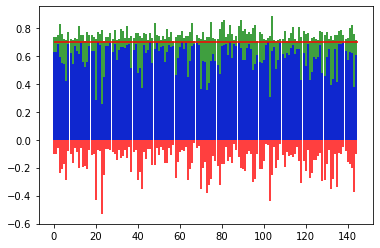

In [15]:
plot_spec(jesse_intersect, 'green')
plot_spec(caleb_intersect, 'blue')
plot_spec(-diff_intersect, 'red')
plot_line(0.7,len(intersection))

## Difference - Jesse's Data (no match in Caleb's 0.7 and higher data)

In [16]:
diff = sorted(list(set(jesse_dict.keys()) - set(caleb_dict_high.keys())))
print(len(diff))

2364


In [17]:
jesse_difference = pd.DataFrame([[jesse_dict[k] for k in diff],diff])
jesse_difference

0                   1                             2  \
0            0.898655             0.90643                      0.815568   
1  (128, ANPFGGASHAK)  (129, ANPFGGASHAK)  (159, A+42.01057AAAAGTATSQR)   

                              3                             4  \
0                      0.933178                      0.936906   
1  (172, A+42.01057SGVAVSDGVIK)  (173, A+42.01057SGVAVSDGVIK)   

                             5                   6                    7  \
0                     0.817754            0.778032             0.740713   
1  (193, A+42.01057TAEVLNIGKK)  (200, AVFPSIVGRPR)  (217, MGLAISLVATEK)   

                                  8                                 9  \
0                          0.745919                          0.750746   
1  (220, A+42.01057AAAAAAAAAGAAGGR)  (221, A+42.01057AAAAAAAAAGAAGGR)   

                            10                             11  \
0                     0.883747                       0.745108   
1  (221, A+42.01057EVQVLVLDGR)  (234, A+42.01057TTATMATSGSAR)   

                     12                  13                    14  \
0              0.832675            0.909129              0.798383   
1  (241, ALLTPVAIAAGRK)  (244, PMFIVNTNVPR)  (245, GAVGALLVYDIAK)   

                             15                          16  \
0                      0.821299                    0.877007   
1  (251, A+42.01057SLSLAPVNIFK)  (255, AVLFC+57.0215LSEDKK)   

                           17                     18                   19  \
0                    0.795085               0.830275             0.802449   
1  (256, FIC+57.0215TTSAIQNR)  (257, VLQATVVAVGSGSK)  (263, LLLLAGVDRLDK)   

                    20                   21                   22  \
0             0.741043             0.745395             0.758478   
1  (266, NPFLAAVTTNRK)  (271, DGTYAVTYIPDK)  (272, DGTYAVTYIPDK)   

                    23                    24                   25  \
0             0.796494              0.860887             0.747202   
1  (275, AYVVLGQFLVLK)  (276, DAAIYLVTSLASK)  (280, LLDSSTVTHLFK)   

                    26                     27                   28  \
0              0.80116               0.730592              0.70639   
1  (281, LLDSSTVTHLFK)  (285, ATIAGGGVIPHIHK)  (290, DSLTLVFVETKK)   

                    29                            30  \
0             0.825301                      0.907716   
1  (292, QLEMILNKPGLK)  (296, ALAGC+57.0215DFLTISPK)   

                             31                              32  \
0                      0.901134                        0.912361   
1  (297, ALAGC+57.0215DFLTISPK)  (298, A+42.01057TTATMATSGSARK)   

                    33                   34                   35  \
0              0.74094             0.776661             0.840101   
1  (302, GISDLAQHYLMR)  (303, LALDIEIATYRK)  (303, YYVTIIDAPGHR)   

                       36                    37                           38  \
0                0.784293                0.8155                      0.82275   
1  (306, GALQNIIPASTGAAK)  (315, NVLIVEDIIDTGK)  (317, M+42.01057ESYHKPDQQK)   

                      39                    40                             41  \
0                0.79176              0.778585                       0.761644   
1  (321, ALQSVGQIVGEVLK)  (322, EGIPALDNFLDKL)  (323, GVM+15.9949LAVDAVIAELK)   

                    42                    43                              44  \
0             0.811395              0.746773                        0.970295   
1  (328, TPELNLDQFHDK)  (330, NAQLNIELEAAHH)  (333, S+42.01057DAAVDTSSEITTK)   

                     45                              46  \
0              0.713494                        0.967969   
1  (334, NNTVGLIQLNRPK)  (334, S+42.01057DAAVDTSSEITTK)   

                              47                             48  \
0                       0.867686                       0.946202   
1  (337, A+42.01057SASYHISNLLEK)  (338, A+42.01057SASYHISNLLEK)   

                    

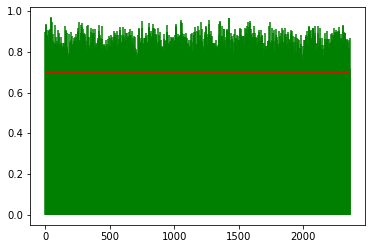

In [18]:
plot_spec(jesse_difference, 'green')
plot_line(0.7,len(diff))

### first 150 (to improve visuals)

In [19]:
jesse_diff_150 = jesse_difference.iloc[:,:150]

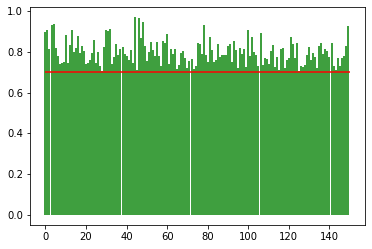

In [20]:
plot_spec(jesse_diff_150, 'green')
plot_line(0.7,150)

## Difference - Caleb's 0.7 or higher Data (no match in Jesse's)

In [21]:
diff = sorted(list(set(caleb_dict_high.keys()) - set(jesse_dict.keys())))
print(len(diff))

25643


In [22]:
caleb_difference = pd.DataFrame([[caleb_dict_high[k] for k in diff],diff])
caleb_difference

0                                    1  \
0                             0.988397                             0.993112   
1  (104, SC(UniMod:4)NC(UniMod:4)LLLK)  (105, SC(UniMod:4)NC(UniMod:4)LLLK)   

                   2                   3                   4  \
0              0.934            0.918058            0.986001   
1  (170, DPQALSEHLK)  (196, VSNSGITRVEK)  (243, AFVDFLSDEIK)   

                     5                   6                             7  \
0             0.981742            0.963733                      0.943831   
1  (243, VTVLFAGQHIAK)  (245, PMFIVNTNVPR)  (255, AVLFC(UniMod:4)LSEDKK)   

                              8                             9  \
0                      0.961515                      0.933239   
1  (256, AVLFC(UniMod:4)LSEDKK)  (256, FIC(UniMod:4)TTSAIQNR)   

                      10                    11                   12  \
0               0.986647              0.968563             0.888305   
1  (259, VLQATVVAVGSGSK)  (282, VGGTSDVEVNEKK)  (284, LLEMILNKPGLK)   

                    13                   14                    15  \
0             0.941048             0.961052              0.969582   
1  (289, VTLTSEEEARLK)  (293, QLEMILNKPGLK)  (294, DLDVAILVGSMPR)   

                     16                              17                   18  \
0              0.973407                        0.972418             0.888179   
1  (295, GVDEATIIDILTK)  (297, ALAGC(UniMod:4)DFLTISPK)  (303, GISDLAQHYLMR)   

                      19                    20                    21  \
0               0.900562              0.980682               0.90213   
1  (306, ILPTLEAVAALGNK)  (330, TVLIMELINNVAK)  (331, GNLEVLLFTIQSK)   

                     22                    23  \
0              0.977752              0.863258   
1  (331, NAQLNIELEAAHH)  (332, GNLEVLLFTIQSK)   

                                24                    25  \
0                         0.970119              0.995304   
1  (335, (UniMod:5)SDAAVDTSSEITTK)  (335, GTQGVVTNFEIFR)   

                               26                              27  \
0                        0.952835                        0.976547   
1  (346, LTDC(UniMod:4)VVMRDPASK)  (347, LTDC(UniMod:4)VVMRDPASK)   

                     28                     29                    30  \
0              0.983146               0.782071              0.993593   
1  (348, IIDSLFNTVTDKK)  (349, GSIFVVFDSIESAK)  (350, NLFFSTNIDDAIK)   

                       31                   32                     33  \
0                0.990094             0.966171               0.937655   
1  (360, LTSFIGAIAIGDLVK)  (364, HLREYQDLLNVK)  (364, LAQANGWGVMVSHR)   

                    34                   35                    36  \
0             0.967023             0.878564              0.902337   
1  (365, HLREYQDLLNVK)  (376, TVWDWELMNDIK)  (377, SLEEIYLFSLPIK)   

                      37                               38  \
0               0.940691                         0.878667   
1  (380, GRTVIIEQSWGSPK)  (383, TVLGTPEVLLGALPGAGGTQRLPK)   

                     39                      40  \
0              0.976694                 0.97223   
1  (385, DAFLGSFLYEYSR)  (385, TIAIIAEGIPEALTR)   

                              41                              42  \
0                       0.927678                        0.935354   
1  (390, LTLYDIAHTPGVAADLSHIETK)  (392, SIQFVDWC(UniMod:4)PTGFK)   

                                43                              44  \
0                         0.960769                        0.979597   
1  (393, DC(UniMod:4)GATWVVLGHSER)  (393, SIQFVDWC(UniMod:4)PTGFK)   

                                45                     46  \
0                         0.988075               0.960475   
1  (394, DC(UniMod:4)GATWVVLGHSER)  (397, SFLAMVVDIVQELK)   

                         47                      48                       49  \
0                  0.971001                0.937746                 0.841234   
1  (401, NLTALGLNLVAS

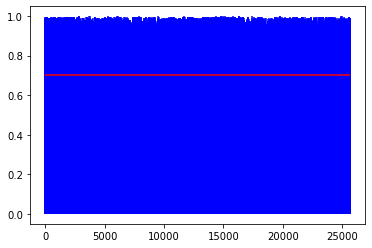

In [23]:
plot_spec(caleb_difference, 'blue')
plot_line(0.7,len(diff))

### first 150 (to improve visuals)

In [24]:
caleb_diff_150 = caleb_difference.iloc[:,:150]

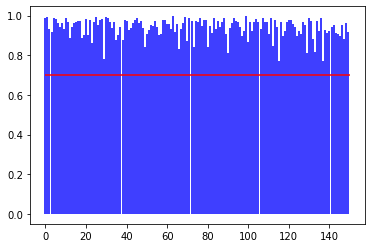

In [25]:
plot_spec(caleb_diff_150, 'blue')
plot_line(0.7,150)